In [1]:
import pandas as pd 


In [87]:
colums = ['building_size', 'construction_year', 'land_size', 'description']
df = pd.read_csv(r'C:\Users\rezaei\OneDrive\Documents\Bootcamp\pro\Divar.csv', usecols=colums)

In [89]:
df.head(10)

,description,land_size,building_size,construction_year
0,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,NaN,500.0,NaN
1,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,NaN,60.0,۱۳۸۴
2,تخلیه پایان ماه,NaN,132.0,۱۴۰۱
3,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,NaN,90.0,۱۴۰۰
4,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,NaN,115.0,۱۴۰۳
5,اپارتمان ۱۰۰متری واحد جلو دارای دو اتاق خواب ک...,NaN,100.0,۱۳۸۹
6,♦مشاورین املاک سیب♦\n✅️کد:G۱۰۵\n♦با سالها سابق...,NaN,80.0,۱۳۹۵
7,♡♡♡♡♡♡بنام خدا♡♡♡♡♡♡\n♡♡♡عرض ادب واحترام♡♡♡\n♡...,NaN,100.0,۱۳۹۳
8,با سلام\n\nاملاک بزرگ اتحاد با ۲شعبه فعال با ف...,NaN,78.0,۱۳۹۶
9,اول رسالت فرد نزدیک به حاشیه فرامرز .. ساکنین...,NaN,80.0,۱۳۸۷


In [91]:
df = df.dropna(subset='construction_year')
df['construction_year'].isna().sum()

0

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815828 entries, 1 to 999999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   description        815828 non-null  object 
 1   land_size          186396 non-null  float64
 2   building_size      815826 non-null  float64
 3   construction_year  815828 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.1+ MB


In [95]:
persian_to_english = str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789")
def convert(x):
    if 'قبل' in str(x):
        return 1365
    return int(str(x).translate(persian_to_english))

In [97]:
df['construction_year'] = df['construction_year'].apply(convert)
df['construction_year'].dtype

dtype('int64')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815828 entries, 1 to 999999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   description        815828 non-null  object 
 1   land_size          186396 non-null  float64
 2   building_size      815826 non-null  float64
 3   construction_year  815828 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 31.1+ MB


In [101]:
df[df.building_size.isna()][['building_size', 'land_size']]

,building_size,land_size
231124,NaN,NaN
299538,NaN,NaN


In [103]:
df.loc[231124, 'description']

'۱۳۱ متر آپارتمان ۳ خوابه\nپارکینگ انباری تراس\nکابینت mdf _ کف سرامیک _ نقاشی شده\nگاز رومیزی _ هود\nفول بازسازی شده\nمبلغ ۹/۷۰۰/۰۰۰/۰۰۰ تومان'

In [105]:
df.loc[299538, 'description']

'انتهای بلوار بعثت خیابان دستغیب جنب مصالح فروشی سلیمانی'

In [107]:
df.loc[231124, 'building_size'] = 131.0

In [119]:
df = df.drop(index=299538)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815827 entries, 1 to 999999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   description        815827 non-null  object 
 1   land_size          186396 non-null  float64
 2   building_size      815827 non-null  float64
 3   construction_year  815827 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 31.1+ MB


In [123]:
df1 = df.copy()

In [133]:
df1 = df1.drop(columns=['description', 'land_size'])

In [141]:
old_houses = df1[df1["construction_year"] < 1396]["building_size"].dropna()
new_houses = df1[df1["construction_year"] >= 1396]["building_size"].dropna()


In [143]:
from scipy import stats

In [145]:
stats.shapiro(old_houses)

C:\Users\rezaei\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 412528.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.0071234802569691835, pvalue=2.3666475623032504e-221)

In [147]:
stats.shapiro(new_houses)

C:\Users\rezaei\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 403299.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.008465789847212912, pvalue=8.633900676012841e-221)

In [155]:
import matplotlib.pyplot as plt

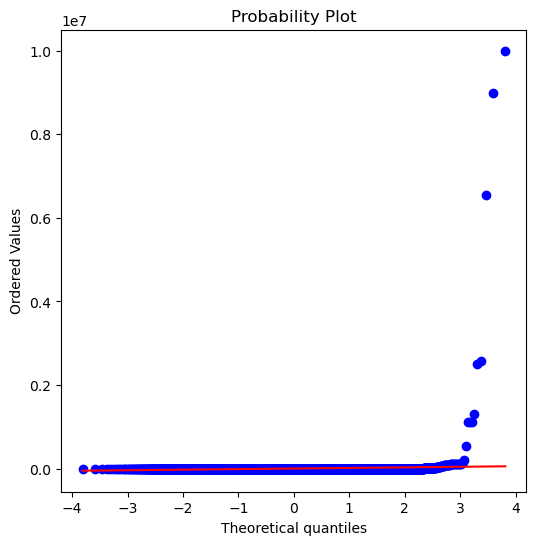

In [165]:
plt.figure(figsize=(6,6))
stats.probplot(old_houses.sample(10000, random_state=42), dist="norm", plot=plt)
plt.show()

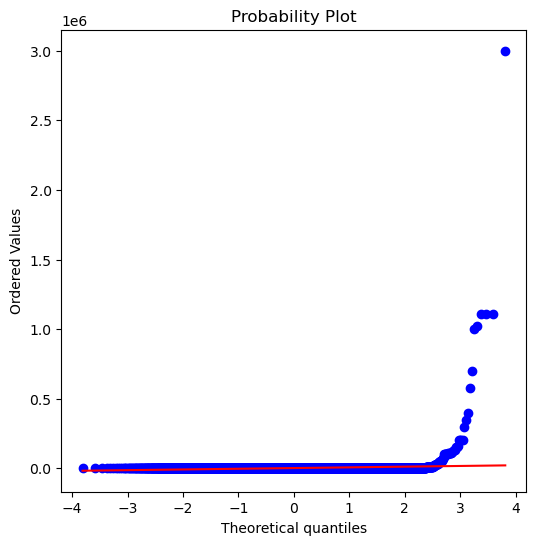

In [163]:
plt.figure(figsize=(6,6))
stats.probplot(new_houses.sample(10000, random_state=42), dist="norm", plot=plt)
plt.show()

In [149]:
u_stat, p_value = stats.mannwhitneyu(old_houses, new_houses, alternative="greater")

In [151]:
u_stat, p_value

(64810500398.5, 1.0)

In [153]:
alpha = 0.05
if p_value < alpha:
    print('The H₀ is rejected. Older houses have more area.')
else:
    print('The H₀ is not rejected. There is not enough evidence that older houses are larger.')

The H₀ is not rejected. There is not enough evidence that older houses are larger.
